In [ ]:
import pandas as pd
import csv
import heapq
import matplotlib.pyplot as plt
import math
from matplotlib.patches import Rectangle
import os

In [ ]:

def plot_grid(grid_size, cell_size, non_walkable_cells, path):

    # Extract the number of rows and columns from the grid_size tuple
    num_rows = grid_size[0]
    num_cols = grid_size[1]

    # Create a figure and axis for plotting, specifying the size of the figure
    fig, ax = plt.subplots(figsize=(12, 9))

    # Set the x and y axis limits based on the grid size and cell size
    ax.set_xlim(0, num_cols * cell_size)
    ax.set_ylim(0, num_rows * cell_size)


    # Set tick marks and labels for the x and y axes
    ax.set_xticks(range(0, num_cols * cell_size, cell_size))
    ax.set_yticks(range(0, num_rows * cell_size, cell_size))
    ax.set_xticklabels(range(1, num_cols + 1))
    ax.set_yticklabels(range(1, num_rows + 1))

    # Draw vertical grid lines
    for i in range(num_cols + 1):
        ax.axvline(i * cell_size, color='black')
    # Draw horizontal grid lines
    for i in range(num_rows + 1):
        ax.axhline(i * cell_size, color='black')

    # Iterate over each cell in the grid
    for i in range(num_rows):
        for j in range(num_cols):
            cell_coord = (i, j)

            # Check if the cell is in the list of non-walkable cells
            if cell_coord in non_walkable_cells:
                # Add a green rectangle to represent a non-walkable cell
                ax.add_patch(Rectangle((i * cell_size, j * cell_size), cell_size, cell_size, facecolor='green'))
                # Add a white text label in the center of the cell
                ax.text((i + 0.5) * cell_size, (j + 0.5) * cell_size, str((j * num_cols) + i + 1),
                        ha='center', va='center', fontsize=5, color='white')

            # Check if the cell is in the list of cells in the path
            elif cell_coord in path:
                # Add a blue rectangle to represent a cell in the path
                ax.add_patch(Rectangle((i * cell_size, j * cell_size), cell_size, cell_size, facecolor='skyblue'))

                ax.text((i + 0.5) * cell_size, (j + 0.5) * cell_size, str((j * num_cols) + i + 1),
                        ha='center', va='center', fontsize=5, color='white')
            else:
                ax.text((i + 0.5) * cell_size, (j + 0.5) * cell_size, str((j * num_cols) + i + 1),
                        ha='center', va='center', fontsize=5)
    # Remove tick marks from the axes
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

In [ ]:
#Manhattan distance heuristic
def heuristic(a, b):
    return abs(b[0] - a[0]) + abs(b[1] - a[1])


In [ ]:
def get_neighbors(current, grid_size, non_walkable_cells):

    # Unpack the grid_size tuple into num_rows and num_cols
    num_rows, num_cols = grid_size
    # Create a list called neighbors to store neighboring cells
    neighbors = []
    # Define a list, representing potential moves to neighboring cells
    possible_moves = [(0, -1), (0, 1), (-1, 0), (1, 0)]
    # You can include diagonal moves by uncommenting the following line:
     #(-1, -1), (-1, 1), (1, -1), (1, 1)]

    # Iterate through each possible move
    for move in possible_moves:
        # Calculate the new_row and new_col by adding the move offsets to the current position
        new_row = current[0] + move[0]
        new_col = current[1] + move[1]
        # Create a new_cell tuple with the new_row and new_col
        new_cell = (new_row, new_col)

        # Check if the new_cell is within the grid bounds and not in the list of non-walkable cells
        if (0 <= new_row < num_rows) and (0 <= new_col < num_cols) and (new_cell not in non_walkable_cells):
            neighbors.append(new_cell)

    return neighbors

In [ ]:
def astar(start, goal, grid_size, non_walkable_cells):

    #empty list called open_list to manage the nodes to be evaluated
    open_list = []
    # Push a tuple containing the start node with a priority of 0 into the open_list using heapq
    heapq.heappush(open_list, (0, start))

    # Create a dictionary called g_score to store the cost of reaching each node from the start node
    g_score = {start: 0}
    # Create a dictionary called f_score to store the total estimated cost of reaching each node
    f_score = {start: heuristic(start, goal)}
    came_from = {}

    # While there are nodes to evaluate in the open_list
    while open_list:
        # Pop the node with the lowest f_score value from the open_list
        current = heapq.heappop(open_list)[1]

        # If the current node is the goal node
        if current == goal:
            # Reconstruct and return the path from start to goal
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path


        # Iterate through the neighboring nodes of the current node
        for neighbor in get_neighbors(current, grid_size, non_walkable_cells):
            # Calculate the tentative g_score for the neighbor
            tentative_g_score = g_score[current] + 1

            # If the neighbor is not in g_score or the tentative g_score is lower
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                came_from[neighbor] = current
                heapq.heappush(open_list, (f_score[neighbor], neighbor))


   # If no path is found, return None
    return None

In [ ]:
def cell_to_coordinate(cell, num_cols):
    row, col = cell

    # Calculate and return the x and y coordinates based on the cell and num_cols
    # Multiplying col by cell_size gives the x-coordinate, and multiplying row by cell_size gives the y-coordinate
    return col * cell_size, row * cell_size

In [ ]:
def calculate_total_distance(path, grid_size, cell_size):

    # Initialize a variable called total_distance to store the cumulative distance
    total_distance = 0

    # Iterate through the path to calculate distances between consecutive cells
    for i in range(len(path) - 1):
        # Get the starting and ending cells from the path
        start_cell = path[i]
        end_cell = path[i + 1]

        # Convert the cell coordinates to Cartesian coordinates using cell_to_coordinate
        start_coord = cell_to_coordinate(start_cell, grid_size[1])
        end_coord = cell_to_coordinate(end_cell, grid_size[0])
        # Calculate the Euclidean distance between the two coordinates
        distance = math.sqrt((end_coord[0] - start_coord[0]) ** 2 + (end_coord[1] - start_coord[1]) ** 2)
        total_distance += distance

    return total_distance

In [ ]:
def calculate_distances(grid_size, non_walkable_cells, cell_size):
    # Initialize an empty dictionary called distances to store distances between cell pairs
    distances = {}

    # Iterate through all cells in the grid
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            # Define the current cell as the starting cell
            start_cell = (i, j)

            # Create a nested dictionary for the distances from the starting cell
            distances[start_cell] = {}
            # Iterate through all cells in the grid again
            for k in range(grid_size[0]):
                for l in range(grid_size[1]):
                    # Define the target cell as the current cell in the inner loop
                    target_cell = (k, l)

                    # Check if the starting cell is different from the target cell
                    if start_cell != target_cell:
                        # Use the A* pathfinding algorithm to find a route from start_cell to target_cell
                        route = astar(start_cell, target_cell, grid_size, non_walkable_cells)

                        # If a route exists (not None), calculate the total distance and store it along with the route
                        if route:
                            total_distance = calculate_total_distance(route, grid_size, cell_size)
                            distances[start_cell][target_cell] = (total_distance, route)
                        # If no route exists, set the distance to infinity and the route to None
                        else:
                            distances[start_cell][target_cell] = (float('inf'), None)

    return distances

In [ ]:
# Define a function to read non-walkable cells from a CSV file
def read_non_walkable_cells_from_csv(file_path):
    non_walkable_cells = []
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the first row (header)
        for row in reader:
            cell_coord = (int(row[1]), int(row[2]))
            non_walkable_cells.append(cell_coord)
    return non_walkable_cells

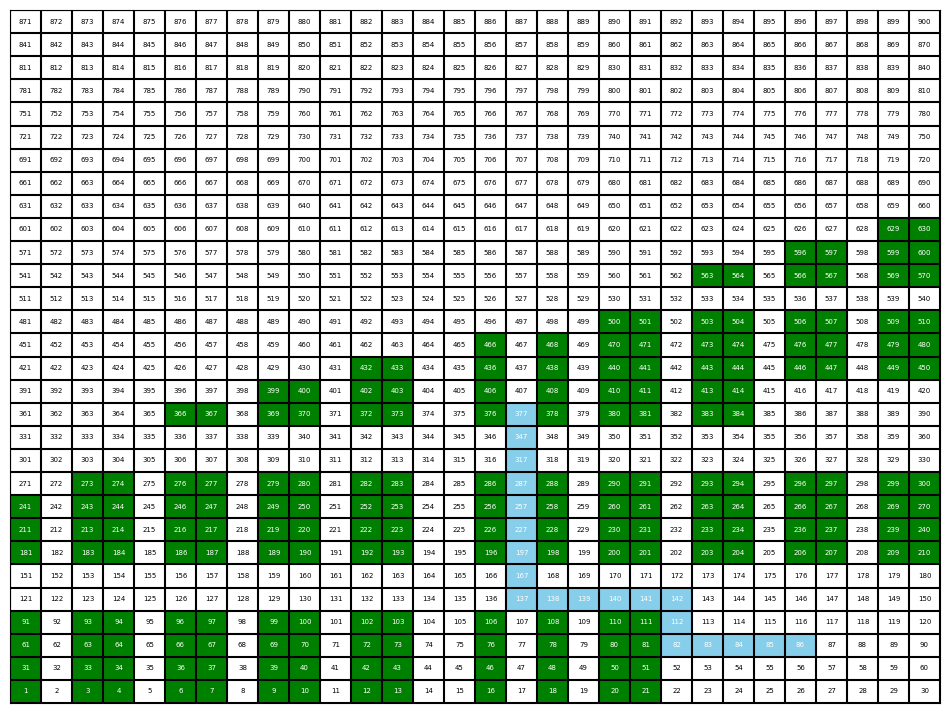

Route found: [(25, 2), (24, 2), (23, 2), (22, 2), (21, 2), (21, 3), (21, 4), (20, 4), (19, 4), (18, 4), (17, 4), (16, 4), (16, 5), (16, 6), (16, 7), (16, 8), (16, 9), (16, 10), (16, 11), (16, 12)]
Total distance: 19.0


In [ ]:
# Example usage:
# Define the size of the grid and the size of each cell
grid_size = (30, 30)
cell_size = 1

# Define the starting and target cells
start_cell = (25, 2)
target_cell = (16, 12)

# Specify the path to the CSV file containing non-walkable cell coordinates
csv_file_path = 'Racks_cells.csv'
# Read non-walkable cell coordinates from the CSV file
non_walkable_cells = read_non_walkable_cells_from_csv(file_path = csv_file_path)

#uncommand this if you want to create a distyance for all cells
#distances = calculate_distances(grid_size, non_walkable_cells, cell_size)

# Use A* algorithm to find a route from start_cell to target_cell
route = astar(start_cell, target_cell, grid_size, non_walkable_cells)

# Plot the grid with the route
plot_grid(grid_size, cell_size, non_walkable_cells, route)


# Check if a route was found
if route:
    print("Route found:", route)
    total_distance = calculate_total_distance(route, grid_size, cell_size)
    print("Total distance:", total_distance)
else:
    print("No route found.")

#writing distances to CSV

#with open('distances_cells.csv', 'w', newline='') as csvfile:
#    writer = csv.writer(csvfile)
#    writer.writerow(['Start Cell', 'Start Coordinate', 'Target Cell', 'Target Coordinate', 'Distance', 'Route'])

#    for start_cell, targets in distances.items():
#        for target_cell, (distance, route) in targets.items():
#            start_coord = cell_to_coordinate(start_cell, grid_size[1])
#            target_coord = cell_to_coordinate(target_cell, grid_size[1])

#            if route:
#                writer.writerow([start_cell, start_coord, target_cell, target_coord, distance, route])
#            else:
#                writer.writerow([start_cell, start_coord, target_cell, target_coord, "No route", "No route"])